<a href="https://colab.research.google.com/github/Priyanka3008/StockPricePrediction/blob/main/StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Collection**
Source of the Dataset: Yahoo Finance

In [ ]:
import yfinance as yf
data=yf.download('AAPL',start='2008-01-01',end='2024-01-01')
print(data.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close      Volume
Date                                                                     
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.883145  1079178800
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.885862   842066400
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.436563  1455832000
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.363794  2072193200
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.170849  1523816000


In [ ]:
type(data)

pandas.core.frame.DataFrame

Explanation about the columns
1. Date: date of the stock
2. Open: price of the stock opened at the particular day
3. High: highest price of the stock during the day
4. Low: lowest price of the stock during the day
5. Close: closing price of the stock atg the end of the day
6. Adj Close: closing price for adjusted corperate actions like stock splits,dividents etc..
7. Volume: Number of shares traded during the day

**Calculation of Weighted Average Price (VWAP)**
Creating a new column

In [ ]:
data['PriceVolume']=data['Close']*data['Volume']
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.883145  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.885862   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.436563  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.363794  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.170849  1523816000   

             PriceVolume  
Date                      
2008-01-02  7.509542e+09  
2008-01-03  5.862286e+09  
2008-01-04  9.361519e+09  
2008-01-07  1.314659e+10  
2008-01-08  9.319767e+09  


In [ ]:
data['CumPriceVolume']=data['PriceVolume'].cumsum()
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.883145  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.885862   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.436563  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.363794  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.170849  1523816000   

             PriceVolume  CumPriceVolume  
Date                                      
2008-01-02  7.509542e+09    7.509542e+09  
2008-01-03  5.862286e+09    1.337183e+10  
2008-01-04  9.361519e+09    2.273335e+10  
2008-01-07  1.314659e+10    3.587993e+10  
2008-01-08  9.319767e+09    4.519970e+10  


In [ ]:
data['CumVol']=data['Volume'].cumsum()
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.883145  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.885862   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.436563  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.363794  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.170849  1523816000   

             PriceVolume  CumPriceVolume      CumVol  
Date                                                  
2008-01-02  7.509542e+09    7.509542e+09  1079178800  
2008-01-03  5.862286e+09    1.337183e+10  1921245200  
2008-01-04  9.361519e+09    2.273335e+10  3377077200  
2008-01-07  1.314659e+10    3.587993e+10  5449270400  
2008-01-08  9.319767e+09    4.519970e+10  6973086400  


In [ ]:
data['VWAP']=data['CumPriceVolume']/data['CumVol']
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.883145  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.885862   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.436563  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.363794  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.170849  1523816000   

             PriceVolume  CumPriceVolume      CumVol      VWAP  
Date                                                            
2008-01-02  7.509542e+09    7.509542e+09  1079178800  6.958571  
2008-01-03  5.862286e+09    1.337183e+10  1921245200  6.959980  
2008-01-04  9.361519e+09    2.273335e+10  3377077200  6.731664  
2008-01-07  1.314659e+10    3.587993e+10  5449270400  6.584356  
2008-01-08  9.319767e+09    4.519970e+10  6973086400  6.482022  


In [ ]:
data=data.drop(['PriceVolume','CumPriceVolume','CumVol'],axis=1)
print(data.head())

                Open      High       Low     Close  Adj Close      Volume  \
Date                                                                        
2008-01-02  7.116786  7.152143  6.876786  6.958571   5.883145  1079178800   
2008-01-03  6.978929  7.049643  6.881786  6.961786   5.885862   842066400   
2008-01-04  6.837500  6.892857  6.388929  6.430357   5.436563  1455832000   
2008-01-07  6.473214  6.557143  6.079643  6.344286   5.363794  2072193200   
2008-01-08  6.433571  6.516429  6.100000  6.116071   5.170849  1523816000   

                VWAP  
Date                  
2008-01-02  6.958571  
2008-01-03  6.959980  
2008-01-04  6.731664  
2008-01-07  6.584356  
2008-01-08  6.482022  


# **Data Cleaning**

This includes cleaning the data and undestanding about the data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4027 entries, 2008-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4027 non-null   float64
 1   High       4027 non-null   float64
 2   Low        4027 non-null   float64
 3   Close      4027 non-null   float64
 4   Adj Close  4027 non-null   float64
 5   Volume     4027 non-null   int64  
 6   VWAP       4027 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 251.7 KB


This dataset contains int and float datatypes

In [ ]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0
VWAP,0


In [ ]:
data.duplicated().sum()

0

This data has no null values

In [ ]:
data.corr()

,Open,High,Low,Close,Adj Close,Volume,VWAP
Open,1.000000,0.999917,0.999899,0.999792,0.999702,-0.515346,0.931433
High,0.999917,1.000000,0.999876,0.999900,0.999809,-0.514554,0.931458
Low,0.999899,0.999876,1.000000,0.999905,0.999820,-0.516502,0.931599
Close,0.999792,0.999900,0.999905,1.000000,0.999912,-0.515551,0.931530
Adj Close,0.999702,0.999809,0.999820,0.999912,1.000000,-0.510341,0.929528
Volume,-0.515346,-0.514554,-0.516502,-0.515551,-0.510341,1.000000,-0.666302
VWAP,0.931433,0.931458,0.931599,0.931530,0.929528,-0.666302,1.000000


<Axes: >

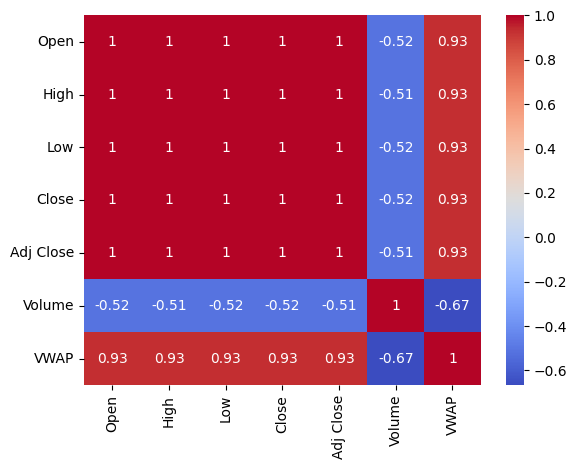

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume,VWAP
count,4027.000000,4027.000000,4027.000000,4027.000000,4027.000000,4.027000e+03,4027.000000
mean,53.021076,53.595687,52.470803,53.057953,51.070595,3.184894e+08,12.088148
std,54.879229,55.494029,54.314221,54.934464,55.018785,3.297178e+08,5.344514
min,2.835357,2.928571,2.792857,2.792857,2.361228,2.404830e+07,4.653318
25%,14.463750,14.608750,14.313571,14.466428,12.276419,9.914470e+07,7.250478
50%,28.250000,28.545000,27.950001,28.250000,25.729797,1.846420e+08,11.884618
75%,66.422497,67.031250,65.751251,66.582500,64.798809,4.293618e+08,14.887911
max,198.020004,199.619995,197.000000,198.110001,197.589523,3.372970e+09,23.745232


# **MinMax Scaler for train and test data**

In [ ]:
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
cols=['Open','High','Low','Close','Adj Close','Volume','VWAP']
data[cols]=scaler.fit_transform(data[cols])
print(data.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2008-01-02  0.021935  0.021473  0.021029  0.021328   0.018040  0.315066   
2008-01-03  0.021229  0.020952  0.021054  0.021344   0.018054  0.244263   
2008-01-04  0.020504  0.020155  0.018517  0.018624   0.015753  0.427536   
2008-01-07  0.018638  0.018448  0.016924  0.018183   0.015380  0.611583   
2008-01-08  0.018435  0.018241  0.017029  0.017014   0.014391  0.447836   

                VWAP  
Date                  
2008-01-02  0.120745  
2008-01-03  0.120819  
2008-01-04  0.108860  
2008-01-07  0.101144  
2008-01-08  0.095784  


<Axes: >

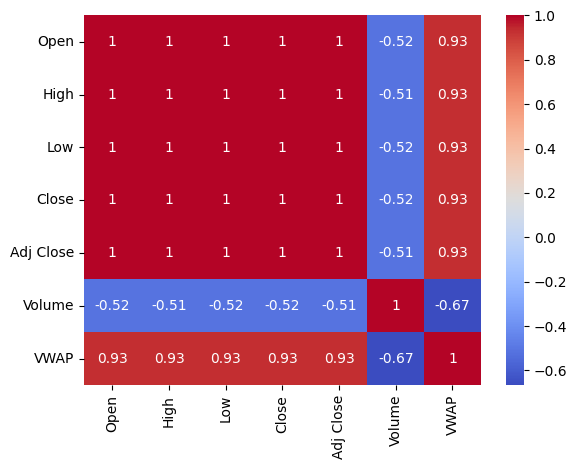

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [ ]:
test_data=yf.download('AAPL',start='2024-01-01',end='2024-08-01')
print(test_data)

[*********************100%%**********************]  1 of 1 completed

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.152283   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.765945   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.432098   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.703995   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.072495   
...                ...         ...         ...         ...         ...   
2024-07-25  218.929993  220.850006  214.619995  217.490005  217.490005   
2024-07-26  218.699997  219.490005  216.009995  217.960007  217.960007   
2024-07-29  216.960007  219.300003  215.750000  218.240005  218.240005   
2024-07-30  219.190002  220.330002  216.119995  218.800003  218.800003   
2024-07-31  221.440002  223.820007  220.630005  222.080002  222.080002   

              Volume  
Date          

In [ ]:
test_data['CumVol']=test_data['Volume'].cumsum()
print(test_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.152283   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.765945   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.432098   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.703995   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.072495   

              Volume     CumVol  
Date                             
2024-01-02  82488700   82488700  
2024-01-03  58414500  140903200  
2024-01-04  71983600  212886800  
2024-01-05  62303300  275190100  
2024-01-08  59144500  334334600  


In [ ]:
test_data['PriceVolume']=test_data['Close']*test_data['Volume']
print(test_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.152283   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.765945   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.432098   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.703995   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.072495   

              Volume     CumVol   PriceVolume  
Date                                           
2024-01-02  82488700   82488700  1.531320e+10  
2024-01-03  58414500  140903200  1.076287e+10  
2024-01-04  71983600  212886800  1.309454e+10  
2024-01-05  62303300  275190100  1.128811e+10  
2024-01-08  59144500  334334600  1.097485e+10  


In [ ]:
test_data['CumPriceVolume']=test_data['PriceVolume'].cumsum()
print(test_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.152283   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.765945   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.432098   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.703995   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.072495   

              Volume     CumVol   PriceVolume  CumPriceVolume  
Date                                                           
2024-01-02  82488700   82488700  1.531320e+10    1.531320e+10  
2024-01-03  58414500  140903200  1.076287e+10    2.607607e+10  
2024-01-04  71983600  212886800  1.309454e+10    3.917061e+10  
2024-01-05  62303300  275190100  1.128811e+10    5.045872e+10  
2024-01-08  59144500  334334600  1.097485e+10    6.143358e+10  


In [ ]:
test_data['VWAP']=test_data['CumPriceVolume']/test_data['CumVol']
print(test_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.152283   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.765945   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.432098   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.703995   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.072495   

              Volume     CumVol   PriceVolume  CumPriceVolume        VWAP  
Date                                                                       
2024-01-02  82488700   82488700  1.531320e+10    1.531320e+10  185.639999  
2024-01-03  58414500  140903200  1.076287e+10    2.607607e+10  185.063745  
2024-01-04  71983600  212886800  1.309454e+10    3.917061e+10  183.997368  
2024-01-05  62303300  275190100  1.128811e+10    5.045872e+10  183.359511  
2024-01-08  59144500  334

In [ ]:
test_data=test_data.drop(['PriceVolume','CumPriceVolume','CumVol'],axis=1)
print(test_data.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2024-01-02  187.149994  188.440002  183.889999  185.639999  185.152283   
2024-01-03  184.220001  185.880005  183.429993  184.250000  183.765945   
2024-01-04  182.149994  183.089996  180.880005  181.910004  181.432098   
2024-01-05  181.990005  182.759995  180.169998  181.179993  180.703995   
2024-01-08  182.089996  185.600006  181.500000  185.559998  185.072495   

              Volume        VWAP  
Date                              
2024-01-02  82488700  185.639999  
2024-01-03  58414500  185.063745  
2024-01-04  71983600  183.997368  
2024-01-05  62303300  183.359511  
2024-01-08  59144500  183.748782  


In [ ]:
cols=['Open','High','Low','Close','Adj Close','Volume','VWAP']
test_data[cols]=scaler.fit_transform(test_data[cols])
print(test_data.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2024-01-02  0.306481  0.311168  0.287060  0.295617   0.290902  0.225903   
2024-01-03  0.265289  0.275025  0.280394  0.275709   0.271109  0.112224   
2024-01-04  0.236187  0.235635  0.243443  0.242194   0.237789  0.176298   
2024-01-05  0.233938  0.230976  0.233155  0.231739   0.227394  0.130587   
2024-01-08  0.235344  0.271072  0.252427  0.294471   0.289763  0.115671   

                VWAP  
Date                  
2024-01-02  0.602250  
2024-01-03  0.556218  
2024-01-04  0.471035  
2024-01-05  0.420083  
2024-01-08  0.451178  


# **Exploratory Data Analysis**

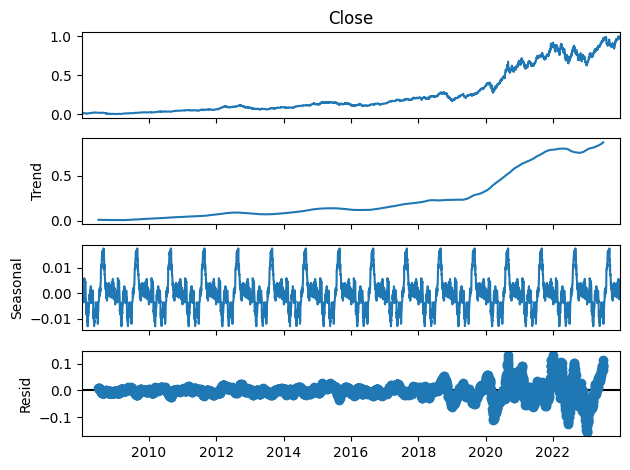

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(data['Close'], model='additive', period=252)
result.plot()
plt.show()

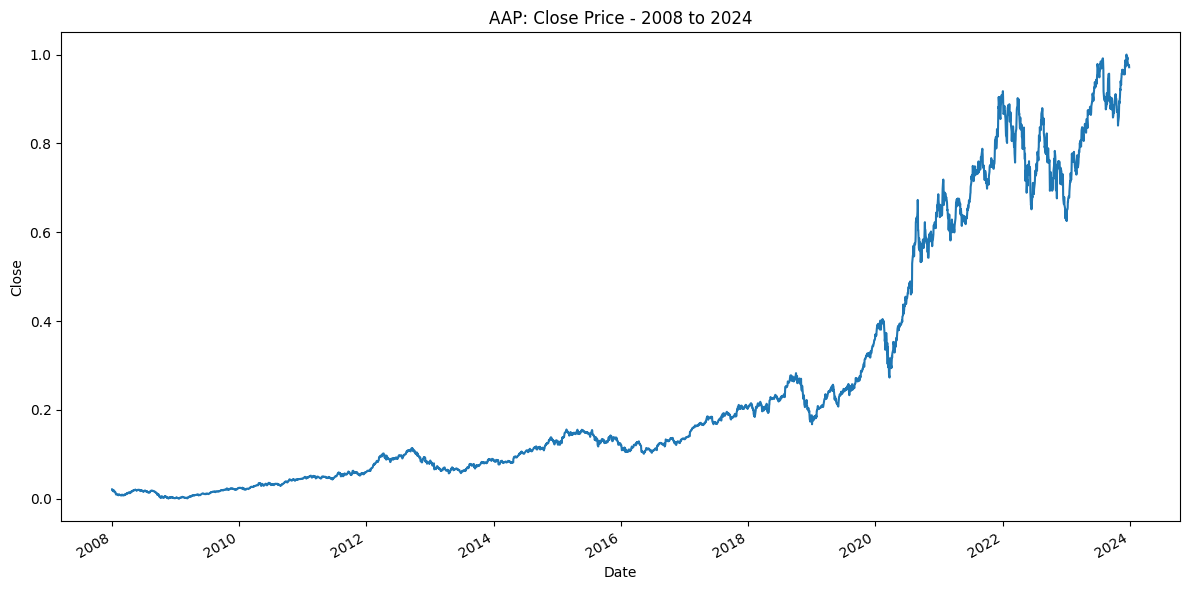

In [ ]:
plt.figure(figsize=(12, 6))
plt.title(f"AAP: Close Price - 2008 to 2024")
plt.xlabel("Date")
plt.ylabel("Close")
data["Close"].plot()
plt.tight_layout()
plt.show()

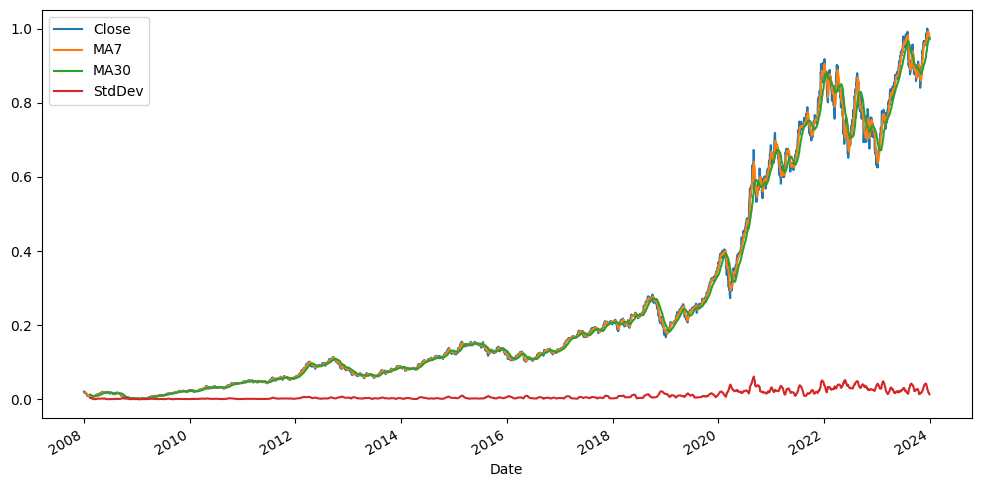

In [ ]:
data['MA7'] = data['Close'].rolling(window=7).mean()
data['MA30'] = data['Close'].rolling(window=30).mean()
data['StdDev'] = data['Close'].rolling(window=30).std()

data[['Close', 'MA7', 'MA30', 'StdDev']].plot(figsize=(12, 6))
plt.show()

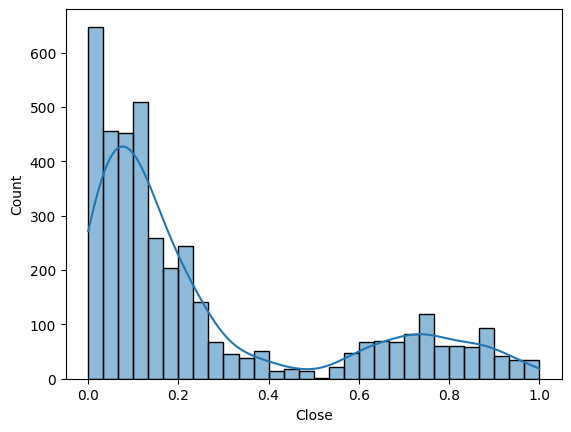

In [ ]:
sns.histplot(data['Close'], kde=True)
plt.show()

The graph represents the data is towards right side but some portion is not present

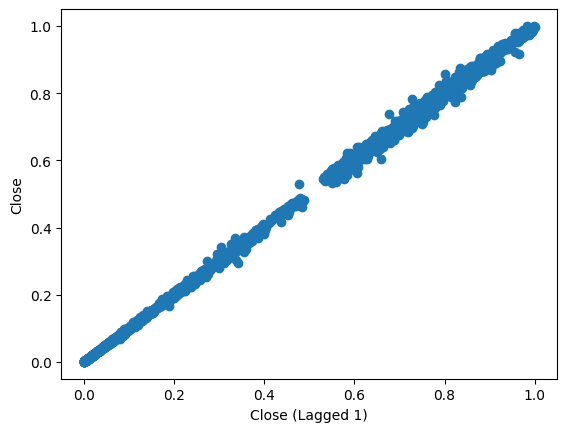

In [ ]:
plt.scatter(data['Close'].shift(1), data['Close'])
plt.xlabel('Close (Lagged 1)')
plt.ylabel('Close')
plt.show()

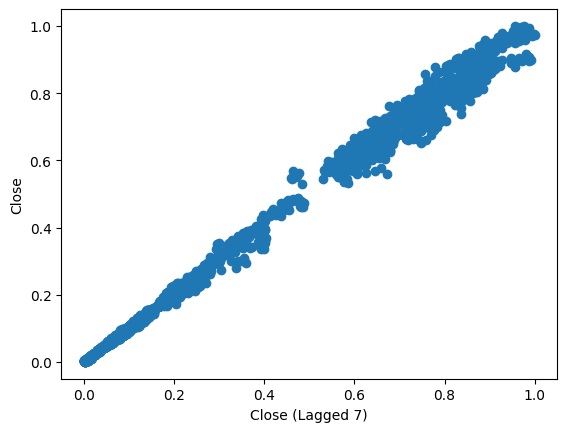

In [ ]:
plt.scatter(data['Close'].shift(7), data['Close'])
plt.xlabel('Close (Lagged 7)')
plt.ylabel('Close')
plt.show()

It represents a high positive corelation

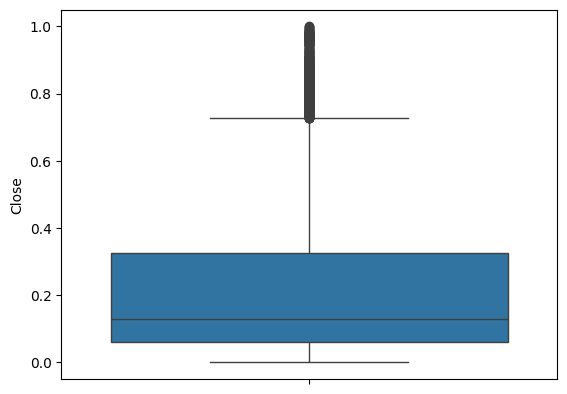

In [ ]:
sns.boxplot(data['Close'])
plt.show()

This data contains outliers

# **Approaches to confirm and remove outliers**

In [ ]:
from scipy import stats
z_scores = stats.zscore(data['Close'])
outliers = data['Close'][abs(z_scores) > 3]
print(outliers)

Series([], Name: Close, dtype: float64)


Outliers are confirmed based on the IQR

In [ ]:
Q1 = data['Close'].quantile(0.25)
Q3 = data['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers = data['Close'][((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]
print(outliers.count())

525


In [ ]:
filtered_data = data[~((data['Close'] < (Q1 - 1.5 * IQR)) | (data['Close'] > (Q3 + 1.5 * IQR)))]

In [ ]:
filtered_data.loc[:,'Close_Lag1'] = filtered_data['Close'].shift(1)
filtered_data.loc[:,'Close_Lag5'] = filtered_data['Close'].shift(5)
filtered_data.loc[:,'Close_Lag180'] = filtered_data['Close'].shift(180)
filtered_data = filtered_data.dropna()

<ipython-input-35-912654939447>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:,'Close_Lag1'] = filtered_data['Close'].shift(1)
<ipython-input-35-912654939447>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data.loc[:,'Close_Lag5'] = filtered_data['Close'].shift(5)
<ipython-input-35-912654939447>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen


# **Model Selection**

predicting stock for next 5 days is ARIMA model

In [ ]:
filtered_data.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,,
2008-09-18,0.009365,0.009702,0.007812,0.010220,0.008644,0.493354,0.048829,0.011702,0.015672,0.002631,0.009075,0.013613,0.021328
2008-09-19,0.011566,0.011294,0.010686,0.011467,0.009699,0.420084,0.048612,0.011422,0.015534,0.002741,0.010220,0.012935,0.021344
2008-09-22,0.011079,0.010577,0.009647,0.009664,0.008174,0.248637,0.048402,0.010858,0.015299,0.002932,0.011467,0.011366,0.018624
2008-09-23,0.009599,0.009769,0.008912,0.008894,0.007523,0.375141,0.048038,0.010281,0.015014,0.003126,0.009664,0.011278,0.018183
2008-09-24,0.008761,0.008888,0.008634,0.009236,0.007812,0.305462,0.047764,0.009976,0.014722,0.003244,0.008894,0.009075,0.017014


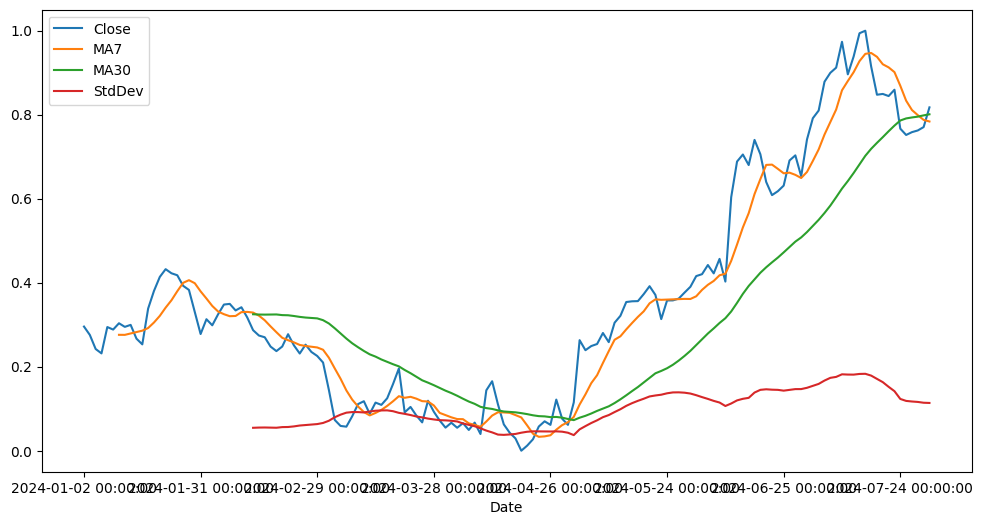

In [ ]:
test_data['MA7'] = test_data['Close'].rolling(window=7).mean()
test_data['MA30'] = test_data['Close'].rolling(window=30).mean()
test_data['StdDev'] = test_data['Close'].rolling(window=30).std()

test_data[['Close', 'MA7', 'MA30', 'StdDev']].plot(figsize=(12, 6))
plt.show()

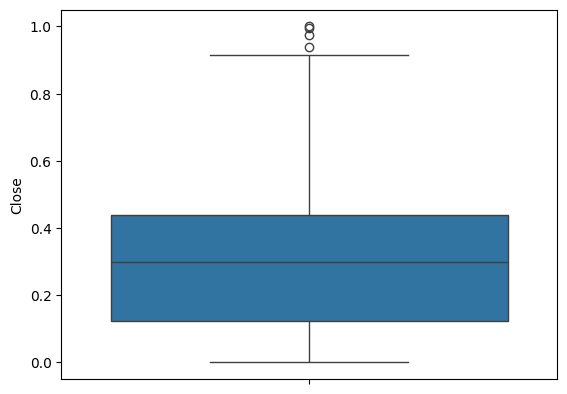

In [ ]:
sns.boxplot(test_data['Close'])
plt.show()

In [ ]:
z_scores = stats.zscore(test_data['Close'])
outliers = test_data['Close'][abs(z_scores) > 3]
print(outliers)

Series([], Name: Close, dtype: float64)


In [ ]:
Q1 = test_data['Close'].quantile(0.25)
Q3 = test_data['Close'].quantile(0.75)
IQR = Q3 - Q1
outliers_test_data = test_data['Close'][((test_data['Close'] < (Q1 - 1.5 * IQR)) | (test_data['Close'] > (Q3 + 1.5 * IQR)))]
print(outliers_test_data.count())

4


In [ ]:
filtered_test_data = test_data[~((test_data['Close'] < (Q1 - 1.5 * IQR)) | (test_data['Close'] > (Q3 + 1.5 * IQR)))]

In [ ]:
filtered_test_data.loc[:,'Close_Lag1'] = filtered_test_data['Close'].shift(1)
filtered_test_data.loc[:,'Close_Lag5'] = filtered_test_data['Close'].shift(5)
filtered_test_data.loc[:,'Close_Lag180'] = filtered_test_data['Close'].shift(180)


In [ ]:
filtered_test_data.head()

,Open,High,Low,Close,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,,


In [ ]:
x_train=filtered_data.drop('Close',axis=1)
y_train=filtered_data['Close']
x_test=filtered_test_data.drop('Close',axis=1)
y_test=filtered_test_data['Close']

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

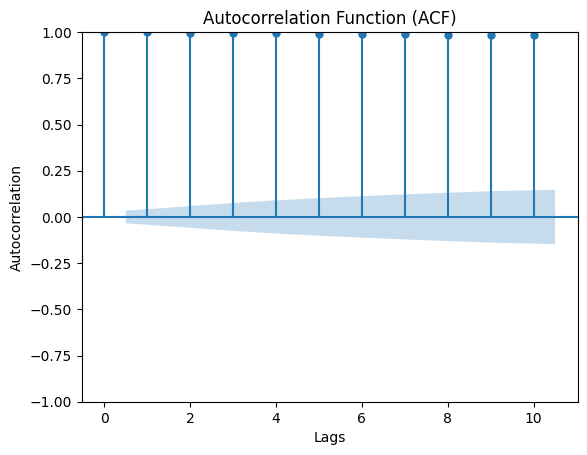

In [ ]:
plot_acf(filtered_data['Close'], lags=10)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

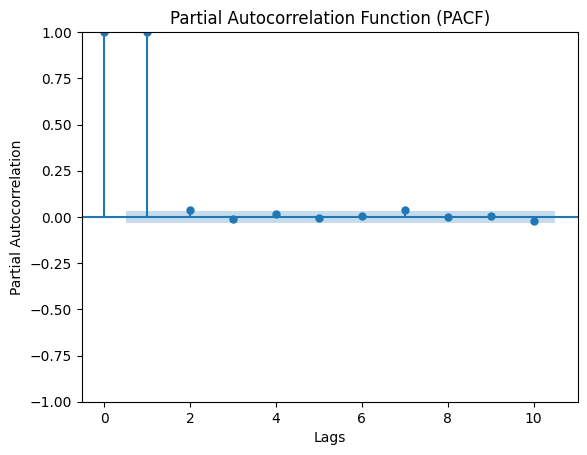

In [ ]:
plot_pacf(filtered_data['Close'], lags=10)
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error

In [ ]:
p=2
d=1
q=0
model = ARIMA(y_train,exog=x_train, order=(p, d, q))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
predictions = model_fit.predict(start=len(y_train),end=len(y_train)+len(y_test)-1,exog=x_test)

ValueError: Prediction must have `end` after `start`.

In [ ]:
y_train.shape

(3322,)

In [ ]:
y_test.shape

(0,)

In [ ]:
x_train.head()

,Open,High,Low,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,
2008-09-18,0.009365,0.009702,0.007812,0.008644,0.493354,0.048829,0.011702,0.015672,0.002631,0.009075,0.013613,0.021328
2008-09-19,0.011566,0.011294,0.010686,0.009699,0.420084,0.048612,0.011422,0.015534,0.002741,0.010220,0.012935,0.021344
2008-09-22,0.011079,0.010577,0.009647,0.008174,0.248637,0.048402,0.010858,0.015299,0.002932,0.011467,0.011366,0.018624
2008-09-23,0.009599,0.009769,0.008912,0.007523,0.375141,0.048038,0.010281,0.015014,0.003126,0.009664,0.011278,0.018183
2008-09-24,0.008761,0.008888,0.008634,0.007812,0.305462,0.047764,0.009976,0.014722,0.003244,0.008894,0.009075,0.017014


In [ ]:
y_train.head()

,Close
Date,
2008-09-18,0.010220
2008-09-19,0.011467
2008-09-22,0.009664
2008-09-23,0.008894
2008-09-24,0.009236


In [ ]:
x_test.head()

,Open,High,Low,Adj Close,Volume,VWAP,MA7,MA30,StdDev,Close_Lag1,Close_Lag5,Close_Lag180
Date,,,,,,,,,,,,


In [ ]:
y_test.head()

,Close
Date,
